Importing the libiraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

Data collection and processing 

In [ ]:
#loading the dataset to a pandas dataframe 
sonar_data = pd.read_csv('/content/Copy of sonar data.csv' , header = None)

In [ ]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Number of rows and columns

In [ ]:
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


How many values are Rocks and Mines

In [ ]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


Seperate the data and labels

In [ ]:
x = sonar_data.drop(columns = 60 , axis = 1)
y = sonar_data[60]

In [ ]:
print(x)
print("******************")
print(y)


         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Training and test data 

In [ ]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size = 0.5, stratify = y , random_state = 5)

In [ ]:
print(x.shape , x_train.shape, x_test.shape )

(208, 60) (104, 60) (104, 60)


In [ ]:
print(x_train, y_train)

         0       1       2       3       4       5       6       7       8   \
50   0.0353  0.0713  0.0326  0.0272  0.0370  0.0792  0.1083  0.0687  0.0298   
109  0.0264  0.0071  0.0342  0.0793  0.1043  0.0783  0.1417  0.1176  0.0453   
61   0.0135  0.0045  0.0051  0.0289  0.0561  0.0929  0.1031  0.0883  0.1596   
180  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   
146  0.1021  0.0830  0.0577  0.0627  0.0635  0.1328  0.0988  0.1787  0.1199   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
91   0.0253  0.0808  0.0507  0.0244  0.1724  0.3823  0.3729  0.3583  0.3429   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
71   0.0036  0.0078  0.0092  0.0387  0.0530  0.1197  0.1243  0.1026  0.1239   
21   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   

         9   ...      50      51      52      53   

Model Training using logestic regression

In [ ]:
model = LogisticRegression()

Train the model

In [ ]:
model.fit(x_train , y_train)

LogisticRegression()

Model Evaluation

In [ ]:
#accuracy on the training data 
x_train_prediction = model.predict(x_train)
training_data_accuracy =  accuracy_score(x_train_prediction, y_train)

In [ ]:
print(f"The Accuracy score is: {training_data_accuracy}")

The Accuracy score is: 0.8653846153846154


In [ ]:
#Testing the data
test_data_predeiction = model.predict(x_test)
accuracy_of_test = accuracy_score(test_data_predeiction , y_test)
print(f"The Accuracy score is: {accuracy_of_test}")

The Accuracy score is: 0.7980769230769231


In [ ]:
input_data = (0.0423,0.0321,0.0709,0.0108,0.1070,0.0973,0.0961,0.1323,0.2462,0.2696,0.3412,0.4292,0.3682,0.3940,0.2965,0.3172,0.2825,0.3050,0.2408,0.5420,0.6802,0.6320,0.5824,0.6805,0.5984,0.8412,0.9911,0.9187,0.8005,0.6713,0.5632,0.7332,0.6038,0.2575,0.0349,0.1799,0.3039,0.4760,0.5756,0.4254,0.5046,0.7179,0.6163,0.5663,0.5749,0.3593,0.2526,0.2299,0.1271,0.0356,0.0367,0.0176,0.0035,0.0093,0.0121,0.0075,0.0056,0.0021,0.0043,0.0017)
input_data_np = np.asarray(input_data)
reshaped_input_data_np = input_data_np.reshape(1, -1)
predicted_value = model.predict(reshaped_input_data_np)
print(predicted_value)
if(predicted_value[0] == "R"):
    print("It is a Rock")

else :
        print("It is a Mine")

['M']
It is a Mine


In [ ]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    # swap top left and top right elements
    cm[[0, 1], [1, 0]] = cm[[0, 0], [1, 0]]

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('cool') ##https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [ ]:
y_pred = model.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1*100)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[44 11]
 [10 39]]
Accuracy :  79.8076923076923
Sensitivity :  0.8
Specificity :  0.7959183673469388


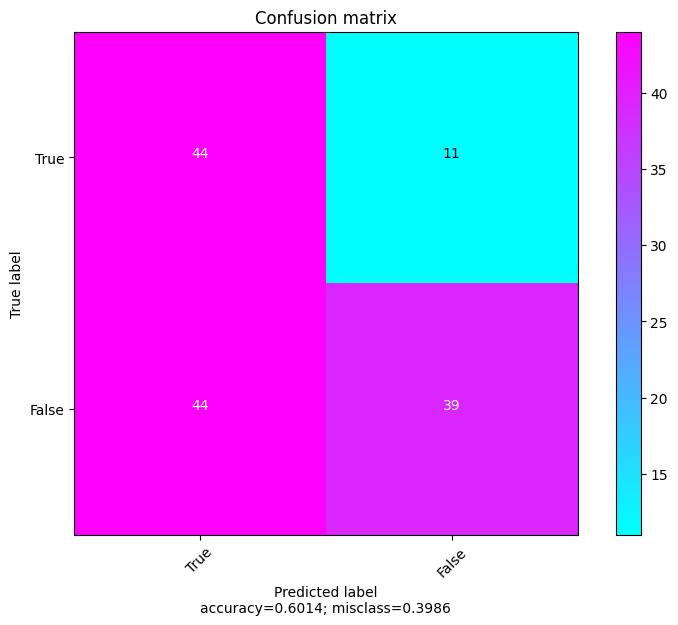

In [ ]:
plot_confusion_matrix(cm1,
                          ["True","False"], # use y_train.unique()  to know order of labels
                          cmap=None,
                          normalize=False)